# Assignment#3(Classification Algorithms)
## Rhichard Koh

# 1. Model Building:
## Build a rbf kernel SVM for the Social_Network_Ads.csv dataset and perform the following: (6 point)

In [154]:
import pandas as pd

df = pd.read_csv('Social_Network_Ads.csv')

In [155]:
X = df.drop(columns=['Purchased'])
y = df['Purchased']

In [156]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [157]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42, stratify = y)

In [158]:
from sklearn.svm import SVC
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X_train,y_train)

SVC()

I. Prediction on a new test point [30, 87000]

In [159]:
import numpy as np
test_point = np.reshape([30, 87000], (1, -1))
test_point = scaler.transform(test_point)
rbf_svm.predict(test_point)

C:\Users\xxryk\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

therefore the person aged 30 with a salary of $87000 did not purchase.

II. Print the confusion matrix.

In [160]:
y_pred = rbf_svm.predict(X_test)

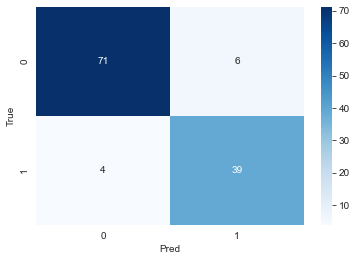

Accuracy score: 0.9166666666666666


In [161]:
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sn

cm = confusion_matrix(y_test, y_pred, labels=rbf_svm.classes_)
sn.heatmap(cm,cmap="Blues", annot=True,fmt='g')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()
print(f"Accuracy score: {accuracy_score(y_test, y_pred)}")

III. Visualizing the decision boundary and training set results

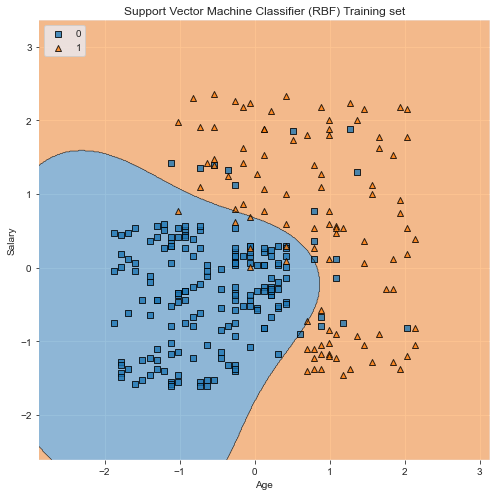

In [162]:
from mlxtend.plotting import plot_decision_regions

fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_train, y_train.to_numpy(), clf=rbf_svm)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Support Vector Machine Classifier (RBF) Training set')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

IV. Visualizing the decision boundary and test set results

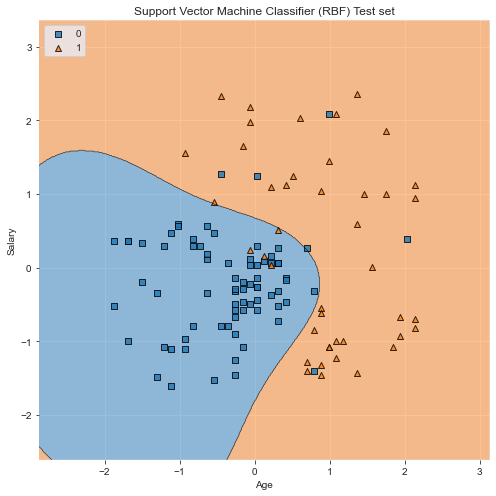

In [163]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_test, y_test.to_numpy(), clf=rbf_svm)
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Support Vector Machine Classifier (RBF) Test set')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 2. Model Building:
## For instructions please refer Assignment#3_Q#2.ipynb (6 point)

# Fit a Decision Tree Model using Scikit-Learn for wine dataset

The wine dataset is one of the datasets scikit-learn comes with that do not require the downloading of any file from some external website. The code below loads the iris dataset. https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html

In [164]:
import pandas as pd
from sklearn.datasets import load_wine
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


## Q1. Build a Decision Tree Classifier model with max_depth = 5, random_state=100 for wine dataset

In [165]:
X_wine = df.drop(columns=['target'])
y_wine = df['target']

In [166]:
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, random_state=100)

In [167]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 5, random_state = 100)
dt.fit(X_train_wine, y_train_wine)
y_pred_wine = dt.predict(X_test_wine)

## Q2. Visualize the constructed Decision Trees using Matplotlib

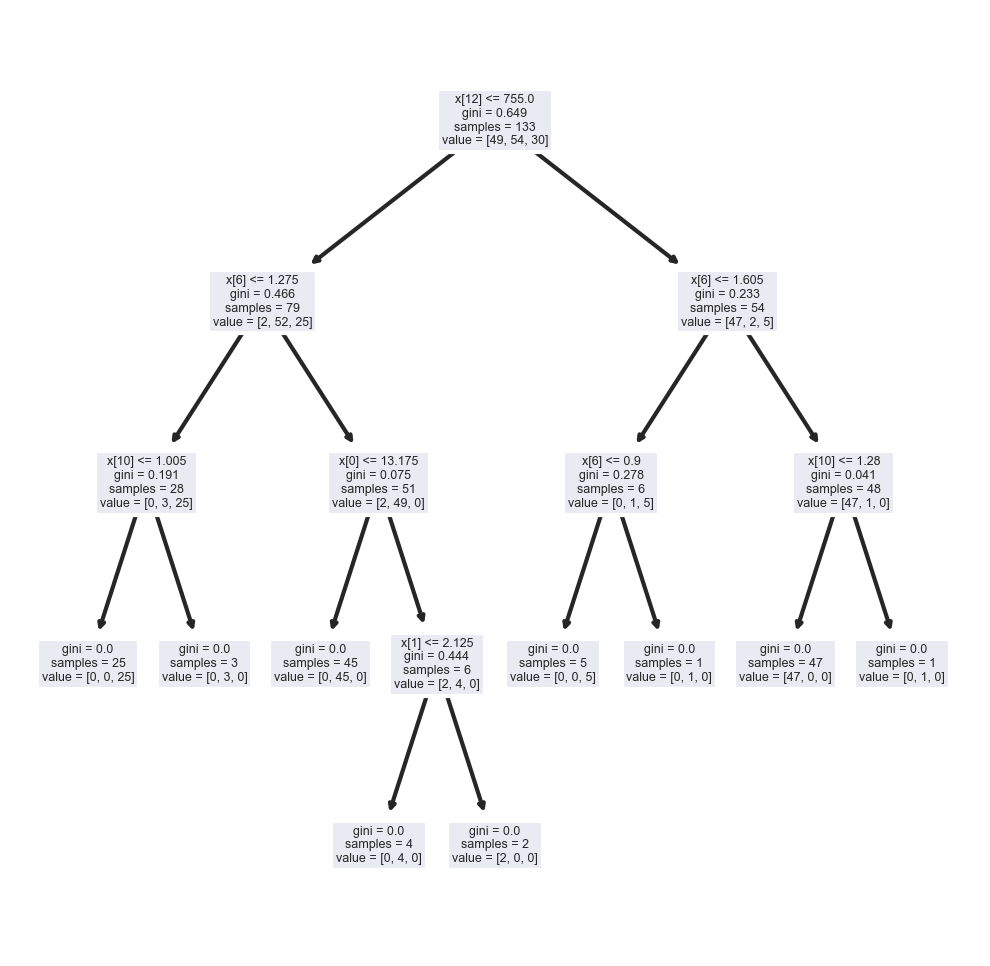

In [168]:
from sklearn.tree import plot_tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt);
fig.savefig('1.png')

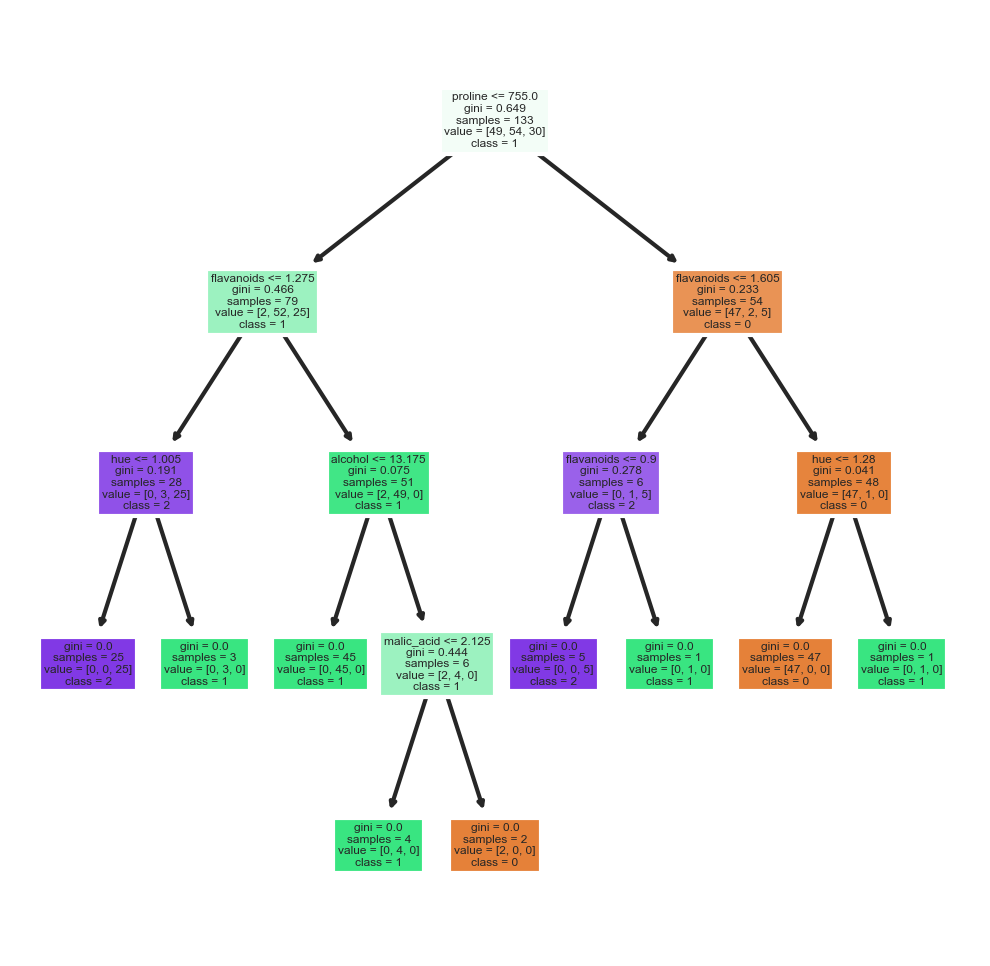

In [169]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dt, feature_names = X_wine.columns.tolist(), class_names=[str(x) for x in y_wine.unique().tolist()], filled = True);
fig.savefig('2.png')

## Q3. Report the Confusion Matrix of the constructed Decison Tree

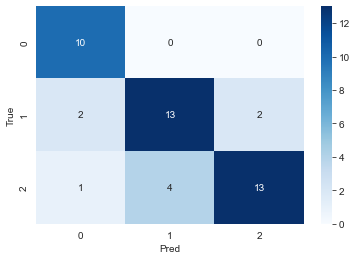

Accuracy score: 0.8


In [170]:
cm = confusion_matrix(y_test_wine, y_pred_wine, labels=dt.classes_)
sn.heatmap(cm,cmap="Blues", annot=True,fmt='g')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()
print(f"Accuracy score: {accuracy_score(y_test_wine, y_pred_wine)}")